#**Lab 1**

TI3155TU Deep Learning (2023 - 2024)

Authors: Aleksandar Shokolarow, Jan Warchocki, Elena Congeduti

Revision: Karol Dobiczek

# Instructions
We highly recommend to work at these labs on Google Colab by saving a copy on your Google Drive (`File` $\rightarrow$ `Save a copy in Drive`) or on Kaggle by downloading this lab as .ipynb file (`File` $\rightarrow$ `Download .ipynb`) and import it into a new Kaggle Notebook.

To work locally, you need to download the lab and configure your virtual environment.

Check the [Lab Instructions](https://brightspace.tudelft.nl/d2l/common/dialogs/quickLink/quickLink.d2l?ou={orgUnitId}&type=content&rcode=tudelft-1344559Instructions) on Brightspace for detailed information on Kaggle set up and virtual environment configuration for local exectuion.

These labs include programming exercises and insight questions.

Follow the instructions in the notebook: fill in the text blocks to answer the questions and write your own code to solve the programming tasks within the designated part of the code blocks:
```python
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################


#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################
```

Solutions will be shared one week after the labs are published.

Note that these labs are designed for practice and are therefore **ungraded**.

**For these labs, you can use only basic tensor operators from the `torch` module unless otherwise specified. Therefore avoid using `torch.nn.F`, `torch.nn.Sequential` or other advanced modules.**

# 1 Introduction to PyTorch

[PyTorch](https://pytorch.org/) is an open-source deep learning framework, designed to provide a flexible and efficient platform for building and training machine learning models.  This library provides essential primitives, including algorithms and data structures, to easily construct powerful deep learning models. In this section, we cover briefly the key core concepts in PyTorch. If you have any doubts or need more information about a specific function or method, it is recommented to refer to the [official documentation](https://pytorch.org/docs/stable/index.html).

Let’s start with importing PyTorch.

In [133]:
import torch

You can verify that PyTorch is correctly installed by printing its version

In [134]:
print(torch.__version__)

2.1.0+cu118


You should see a version printed above, which looks something like `2.0.1+cu118`.

## 1.1 PyTorch Tensors

In PyTorch, tensors are the primary data structures. You can think of a PyTorch tensor as a versatile multidimensional array, much like a Numpy array but finely tuned for deep learning models. For example, `torch` tensors support operations on the GPU, allowing for parallelization.

Creating a PyTorch tensor is very simple. For instace, we can initialize a $3$ dimensional tensor $x\in \mathbb{R}^{3\times 3}$ using `torch.Tensor`.

In [135]:
x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

Accessing elements of a PyTorch tensor is just like how you would access elements in a Numpy array. You can use standard indexing, slicing, etc.

In [136]:
#Create a PyTorch tensor of shape 3x2 with random values between 0 and 1
x = torch.rand(3, 2)
print('\nx:\n', x)

#Modify an element of the tensor
x[2,0] = 10
print('\nx with an element modified:\n', x)

#Use slicing and replace part of the tensor with a 2 tensor containing only zeros
x[:2][0] = torch.zeros(2)
print('\nx after slicing:\n',x)


x:
 tensor([[0.7782, 0.0882],
        [0.9790, 0.2084],
        [0.5930, 0.1905]])

x with an element modified:
 tensor([[ 0.7782,  0.0882],
        [ 0.9790,  0.2084],
        [10.0000,  0.1905]])

x after slicing:
 tensor([[ 0.0000,  0.0000],
        [ 0.9790,  0.2084],
        [10.0000,  0.1905]])


Tensors can be converted to Numpy arrays and Numpy arrays can be converted back to tensors

In [137]:
import numpy as np

#Tensor to array
np_x = x.numpy()

print("PyTorch tensor\n:", x)
print("\nNumpy array\n:", np_x)

PyTorch tensor
: tensor([[ 0.0000,  0.0000],
        [ 0.9790,  0.2084],
        [10.0000,  0.1905]])

Numpy array
: [[ 0.          0.        ]
 [ 0.97903603  0.20843601]
 [10.          0.19049752]]


In [138]:
#Array to tensor
#First option
x1_a = torch.Tensor(np_x)

#Second option
x1_b = torch.from_numpy(np_x)

print("PyTorch tensor a:\n", x1_a)
print("\nPyTorch tensor b:\n", x1_b)

PyTorch tensor a:
 tensor([[ 0.0000,  0.0000],
        [ 0.9790,  0.2084],
        [10.0000,  0.1905]])

PyTorch tensor b:
 tensor([[ 0.0000,  0.0000],
        [ 0.9790,  0.2084],
        [10.0000,  0.1905]])


There is an essential difference between these two methods: the first one generates an independent tensor copy of the Numpy array, while the second option leads to both the tensor and the array sharing the same memory. This means that if you modify the Numpy array, the first tensor is unaffected while the second one gets changed.

****
**Task 1.1:** Verify this yourself by creating two tensor copies x1 and x2 of array np_x using the `torch.Tensor` constructor and `from_numpy` method. Then modify the array np_x and check the impact on the two tensors.
****

In [139]:
np_x = np.arange(10)
print("Numpy array:\n", np_x)

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
x1 = torch.Tensor(np_x)

x2 = torch.from_numpy(np_x)

np_x[1] = 2
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print("\nPyTorch tensor 1:\n", x1)
print("\nPyTorch tensor 2:\n", x2)

Numpy array:
 [0 1 2 3 4 5 6 7 8 9]

PyTorch tensor 1:
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

PyTorch tensor 2:
 tensor([0, 2, 2, 3, 4, 5, 6, 7, 8, 9])


The conversion from tensors to arrays requires the tensor to be on the CPU and not the GPU. If you have a tensor $x$ on GPU, you need first to call the method `.cpu()`: `x = x1.cpu().numpy()`.

An important tensor method is `.view()`, which allows to reshape a tensor to a different shape. The caveat here is that the returned tensor shares memory with the original tensor, which in result saves an expensive copy operation. Thus, modifying the new tensor will modify the original. Best to illustrate this with an example:

In [140]:
# 1 dimensional tensor (vector) with integers from 0 to 15
x = torch.arange(16)
print(f'x:\n{x}\n')

# Reorganize/reshape the vector into a 4x4 matrix
x_view = x.view(4, 4)
print(f'View of x:\n{x_view}\n')

#Mofidy one element of the matrix
x_view[0][0] = 42
print(f'New x:\n{x}')  # <---- NOTE that the original tensor also changed!
print(f'New x_view\n{x_view}')

x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

View of x:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

New x:
tensor([42,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
New x_view
tensor([[42,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])


You can obtain the shape of a tensor unsing `Tensor.shape` as in Numpy or using the `.size()` method.

In [141]:
print("Shape:", x_view.shape)

dim1, dim2 = x_view.size()
print(f"Size: {dim1},{dim2}")

Shape: torch.Size([4, 4])
Size: 4,4


## 1.2 Operations on tensors

We can also perform different operations on tensors. For example, we can add, subtract and multiply tensors.

In [142]:
# Create 2x2 matrix containing numbers from 0 to 3
x1 = torch.arange(4).view(2, 2)

# Create a 2x2 matrix containing numbers from 4 to 7
x2 = torch.arange(4, 8).view(2, 2)

print(f'x1:\n{x1}')
print(f'x2:\n{x2}')
print()

# Add two tensors
print(f'Sum:\n{x1 + x2}\n')

# Subtract one tensor from another
print(f'Difference:\n{x1 - x2}\n')

# Element-wise multiplication of tensor elements
print(f'Element-wise product:\n{x1 * x2}\n')

# Matrix multiplication
print(f'Matrix product:\n{x1 @ x2}\n')


x1:
tensor([[0, 1],
        [2, 3]])
x2:
tensor([[4, 5],
        [6, 7]])

Sum:
tensor([[ 4,  6],
        [ 8, 10]])

Difference:
tensor([[-4, -4],
        [-4, -4]])

Element-wise product:
tensor([[ 0,  5],
        [12, 21]])

Matrix product:
tensor([[ 6,  7],
        [26, 31]])



`torch.matmul` is an equivalent operator to `@` to perform the product over two tensors.

Many `torch` operators support broadcasting, which means that operations are applied to tensors with potentially different shapes in a way that automatically extends or aligns their dimensions to ensure compatibility, enabling element-wise operations.

Here we see a simple example.

In [143]:
#Create 1D random tensor
b = torch.arange(x1.shape[1])

print('x:', x1)
print('\nb:', b)

print('\nBroadcast sum\n', x1+b)


x: tensor([[0, 1],
        [2, 3]])

b: tensor([0, 1])

Broadcast sum
 tensor([[0, 2],
        [2, 4]])


****
**Question 1.2:** Consider the 2-dimentional tensors
$$
x_1=
\begin{pmatrix}
1 & 2 & 3 \\ 4 & 5 & 6
\end{pmatrix}
\hspace{40pt}
x_2 =
\begin{pmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12
\end{pmatrix}
$$
What is the size of the product $x_1 \cdot x_2$? And what about $x_2 \cdot x_1$?

<font color='green'>Write your answere here</font>

The first one should be 2 * 4 while the second one will perform broadcasting, x1 is 2 * 3, x2 is 3 * 4, then that would be 3 * 3, x1 will automatically duplicate its rows and becomes 4 * 3

****
**Task 1.3:**
Compute the product bewteen tensors x1 and x2 and check its shape.
****

In [144]:
x1 = torch.arange(1,7).view(2,3)
x2 = torch.arange(1,13).view(3,4)

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
shape = (x1 @ x2).shape
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

print("\n Shape of ouput tensor y:", shape)


 Shape of ouput tensor y: torch.Size([2, 4])


## 1.3 GPU use

Graphical Processing Units (GPUs) are often used in deep learning due to their ability to parallelize certain operations, such as matrix multiplications. Consequently, deep learning computations performed on GPUs tend to be considerably faster than those on Central Processing Units (CPUs).

Google Colab gives its users the possibility to run their code on a GPU. To enable this feature, you should go to `Runtime -> Change runtime type -> Hardware accelerator -> GPU -> OK`. Afterwards, you will need to rerun all cells in this notebook. We can then check if the GPU is setup correctly and visible to PyTorch:

In [145]:
if torch.cuda.is_available() and torch.cuda.device_count() > 0:
  for device_idx in range(torch.cuda.device_count()):
    device = torch.cuda.get_device_properties(device_idx)
    print(f'GPU {device_idx}:')
    print(f'  Name: {device.name}')
    print(f'  Available memory: {round(device.total_memory / (1024 ** 3), 1)}GB')
else:
  print('No GPU is setup')

GPU 0:
  Name: Tesla T4
  Available memory: 14.7GB


If the GPU is setup correctly, you should see the name of the GPU displayed alongside the available memory. If no GPU is detected, you will see `No GPU setup` printed. If the setup is correct, we can now move our tensors between the GPU and the CPU:

In [146]:
x = torch.rand(10)

#Chek the tensor location
print(f'x is located on {x.device}')

#Move the tensor to GPU
x = x.cuda()

#Chek the tensor location
print(f'x is located on {x.device}')

x is located on cpu
x is located on cuda:0


We can apply functions or operations to tensors located on a GPU just as you would to tensors on a CPU.

# 2 Multi-layer Perceptrons

Modern neural networks consist of many building blocks that are assembled together to create deep and sophisticated architectures. Here we want to introduce you to the basic blocks that will allow you to build your first neural network.


## 2.1 Linear Layers

A linear (fully connected) layer represents a linear transformation of an input $x \in \mathbb{R}^{N_{\text{in}}}$ to an output $y  \in \mathbb{R}^{N_{\text{out}}}$ described as:

$$ y = x\cdot\mathbf{W}  + \mathbf{b}$$

for weight $\mathbf{W}\in \mathbb{R}^{N_{\text{in}} \times N_{\text{out}}}$ and bias $\mathbf{b}\in \mathbb{R}^{N_{\text{out}}}$ matrices. $N_{\text{in}}$ and $N_{\text{out}}$ correspond to the dimension (or features) of the input and output space respectively.

***
**Question 2.1:** What does $\textbf{W}_{ij}$ represent exactly?

<font color='green'>Write your answere here</font>

meaning for the jth output, the weight added to the ith input

Moreover, modern deep learning frameworks are highly parallelizable, allowing them to process multiple inputs at the same time, forming so-called *batches*. Therefore, the full dimension of $x$ will be $ \mathbb{R}^{{\text{batch}} \times N_{\text{in}}} $, $x \cdot\textbf{W}$ is a matrix multiplication and the bias vector is added to each column of this product, i.e. $y=x \cdot\textbf{W}+\,\textbf{1}\cdot\textbf{b}^T$, where $\textbf{1}\in\mathbb{R}^{{\text{batch}}}$ is a vector whose components are all one.


To build such a layer, we can complete the reference implementation provided below

****
**Task 2.2:** Complete the code to initialize the $\mathbf{W}$ and $\mathbf{b}$ matrices with the correct dimensions, and compute the output $y$ of the linear layer.

**Hint**: remember that the sum supports broadcasting.
****

In [147]:
class Linear (object):
    """
    Fully connected layer.
    """

    def __init__(self, N_in, N_out):
        """
        Args:
          N_in:  number of input features (input space dimension)
          N_out: number of output features (output space dimension)
        """
        #############################################################################
        #                           START OF YOUR CODE                              #
        #############################################################################
        self.N_in = N_in
        self.N_out = N_out
        self.weight = torch.Tensor(np.arange(self.N_in * self.N_out)).view(self.N_in, self.N_out)
        self.bias = torch.Tensor(np.arange(self.N_out)).view(1, self.N_out)
        #############################################################################
        #                            END OF YOUR CODE                               #
        #############################################################################

        # Initialize parameters
        self.init_params()

    def init_params(self):
        """
        Initialize layer parameters by sampling from uniform distribution over [0,1)
        """
        self.weight = torch.randn_like(self.weight)
        self.bias = torch.rand_like(self.bias)

    def forward(self, x):
        """
        Forward pass of Linear layer: multiply input tensor by weights and add
        bias.

        Args:
            x: input tensor

        Returns:
            y: output tensor
        """

        #############################################################################
        #                           START OF YOUR CODE                              #
        #############################################################################
        y = x @ self.weight + self.bias
        #############################################################################
        #                            END OF YOUR CODE                               #
        #############################################################################

        return y

Having defined a linear layer, we can now use it to perform a forward pass on some random input $x$.

*****
**Question 2.3:**
The input sample $x$ comprises 2 examples each with 3 dimensions (or features) and a linear layer has 4 units. What is the dimension of the output tensor $y$?

<font color='green'>Write your answere here</font>

should be 2 * 4, 2 means 2 outputs corresponding to each set of inputs (totally 2 examples of inputs), 4 is the dimension of each output

****
**Task 2.4:** Instantiate a linear layer with the variable name ```layer```. Perform a forward pass on the input $x$ and check the shape of the output $y$.
****

In [148]:
# Define layer dimensions and dummy input
batch_size, N_in, N_out = 2, 3, 4

# Make input tensor of dimensions [batch_size, N_in] with random values between -1 and 1
x = 2*torch.randn((batch_size, N_in))-1

#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
layer = Linear(N_in, N_out)
y = layer.forward(x)
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

# Shape output tensor y
print('Shape of ouput tensor y:', y.shape)

Shape of ouput tensor y: torch.Size([2, 4])


In order to validate our solution and further explore the capabilities of PyTorch, we can solve the same exercise by using the building blocks provided by PyTorch.

The linear layer as well as many other useful classes are defined in the **torch.nn** module. A full list of these classes can be found [here](https://pytorch.org/docs/stable/nn.html).

We compare the outputs of both implementations using [`torch.allclose`]( https://pytorch.org/docs/stable/generated/torch.allclose.html) which returns True if the tensors have all their components sufficiently "close" to each other (i.e. if the distance between the two tensors is lower than a small tolerance threshold).

In [149]:
# Create Linear layer from torch.nn module
torch_layer = torch.nn.Linear(N_in, N_out)

# Load the parameters from our layer into the Pytorch layer
torch_layer.weight = torch.nn.Parameter(layer.weight.T) # transpose weight by .T
torch_layer.bias = torch.nn.Parameter(layer.bias)

# Perform forward pass
torch_y = torch_layer(x)

# Shape of output tensor torch_y?
print('Shape of ouput tensor torch_y:', torch_y.shape)

# Compare outputs using torch.allclose
outputs_same = torch.allclose(y, torch_y)
print('Outputs identical: ', outputs_same)

Shape of ouput tensor torch_y: torch.Size([2, 4])
Outputs identical:  True


Your forward implementation of the linear layer is *correct* if `True` is returned.

## 2.2 Activation functions

At this point, you may wonder about the difference between a simple linear regression model and our linear layer, and the short answer is - there is none. However, we aim for our neural network to learn non-linear relationships between the input and output spaces. This is where non-linear activation functions come into play.

One of the most common activation function is the Rectified Linear Unit (ReLU) defined as

$$
\operatorname{ReLU}(x) =
\begin{cases}
x & \text{if } x\geq 0\\
0 & \text{if } x < 0
\end{cases}
\quad= \quad\max\{0, x\}
$$

In [150]:
class ReLU (object):
    """
    ReLU non-linear activation function.
    """
    def __init__(self):
        super(ReLU, self).__init__()

    def forward(self, x):
        """
        Forward pass of ReLU non-linear activation function: y=max(0,x).
        Args:
            x: input tensor

        Returns:
            y: output tensor
        """
        #Clamp all the values below zero and replace them with 0
        y = torch.clamp(x,min=0)

        return y

Now let's now test our implementation on the dummy input tensor $x$.

In [151]:
print('Input tensor x\n:',x)

#Our implementation
relu = ReLU()
y_relu = relu.forward(x)

print('\nOutput of our ReLU implementation:\n',y_relu)

Input tensor x
: tensor([[-0.3894,  0.3744, -1.2067],
        [-0.2117, -4.7340, -2.9832]])

Output of our ReLU implementation:
 tensor([[0.0000, 0.3744, 0.0000],
        [0.0000, 0.0000, 0.0000]])


We can also apply ReLU in PyTorch using the `torch.nn.ReLU` class.

In [152]:
#Torch implementation
torch_relu = torch.nn.ReLU()
torch_y_relu = torch_relu.forward(x)

check = torch.allclose(torch_y_relu,y_relu)
print('\nOutputs identical: ', check)


Outputs identical:  True


****
**Task 2.5:**
Implement your definition of the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function). Then verify your implementation by comparing it with the PyTorch counterpart `torch.nn.sigmoid`.
****

In [153]:
class Sigmoid (object):
    """
    Sigmoid non-linear activation function.
    """
    def forward(self, x):
        """
        Forward pass of Sigmoid non-linear activation function: y=1/(1+exp(-x)).

        Args:
            x: input tensor

        Returns:
            y: output tensor
        """
        ########################################################################
        #                        START OF YOUR CODE                            #
        ########################################################################
        y = y=1/(1+np.exp(-x))
        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

        return y

In [154]:
#Our implementation
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
sigma = Sigmoid()
torch_y_sigma = sigma.forward(x)
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

#Torch implementation
#############################################################################
#                           START OF YOUR CODE                              #
#############################################################################
sigma2 = torch.nn.Sigmoid()
y_sigma = sigma2.forward(x)
#############################################################################
#                            END OF YOUR CODE                               #
#############################################################################

check = torch.allclose(torch_y_sigma,y_sigma)

print('\nOutputs identical: ', check)


Outputs identical:  True


****
**Question 2.6:** What is the shape of the output tensor y for an input tensor x?

<font color='green'>Write your answere here</font>

2 * 3 cause the dimension of x is 2 * 3 and the only forward is to map the x value to y, the tensor diemnsion does not change

A list of all available non-linearities in PyTorch can be found [here](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

Despite the implementation similarity, these two activation function, and in general other activation functions have very different behaviours, especially during training. Therefore, when building a neural network, special consideration has to be paid to them.

## 2.3 Building a network

Using the linear layer and the activation functions described beforehand, we can start piecing together our first neural network. To do so, we can define a base class that will allow us to stack an arbitrary amount of layers and activation functions.

****
**Task 2.7:** Complete the code, performing a forward pass through all the layers in the net.
****

In [155]:
class Net (object):
    """
    Neural network object containing layers.
    """

    def __init__(self, layers):
        """
        Args:
          layers: list of layers in neural network
        """
        self.layers = layers

    def forward(self, x):
        """
        Performs forward pass through all layers of the network.

        Args:
            x: input tensor

        Returns:
            x: output tensor
        """

        ########################################################################
        #                        START OF YOUR CODE                            #
        ########################################################################
        for layer in self.layers:
          x = layer.forward(x)
        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

        return x

As an example, now we can defined a two layer network with an input size of 2, 5 nodes in the hidden layer and an output size of 1.

In [156]:
N_in = 3
hidden_dim = 5
N_out = 1

# Define and initialize layers
layers = [Linear(N_in, hidden_dim),
          ReLU(),
          Linear(hidden_dim, N_out)]

# Initialize network
net = Net(layers)

# Do forward pass
y = net.forward(x)

# What will be the shape of output tensor y?
print('Shape of ouput tensor y:', y.shape)

Shape of ouput tensor y: torch.Size([2, 1])


****
**Question 2.8**: Depict the computational graph for this network.
What do the dimesions of the output correspond to?

<font color='green'>Write your answere here</font>

the output dimension is 2 * 1, which means we have 2 outputs and each one corresponds to one set of inputs, and 1 means that one output's dimension is 1, which is a number


We will now create the same neural network in PyTorch. PyTorch uses the `nn.Module` base class for neural network architectures, which is similar to the `Net` object that we have just defined. However, other than in the `Net` class, you have to define all layers inside the network definition.

This is an important exercise, as this is how you will define all your future models in PyTorch.

You can print a PyTorch `module` to see all sub-modules (i.e. layers) in the module.

****
**Task 2.9:** Complete the code, defining the same layers as we did in our network class with the attribute names ```layer1``` and ```layer2``` and using the activation function ```relu```. Implement the forward pass and initialize a TorchNet object as ```torch_net```.
****

In [157]:
import torch.nn as nn

class TorchNet(nn.Module):
    """
    PyTorch neural network. Network layers are defined in __init__ and forward
    pass implemented in forward.
    """

    def __init__(self, N_in, hidden_dim, N_out):
        """
        Args:
          N_in: number of features in input layer
          hidden_dim: number of features in hidden layer
          N_out: number of features in output layer
        """

        super(TorchNet, self).__init__()

        ########################################################################
        #                        START OF YOUR CODE                            #
        ########################################################################
        self.layer1 = nn.Linear(N_in, hidden_dim)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, N_out)

        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################

    def forward(self, x):
        """
        Performs forward pass through all layers of the network.

        Args:
            x: input tensor

        Returns:
            x: output tensor
        """

        ########################################################################
        #                        START OF YOUR CODE                            #
        ########################################################################
        x = self.layer1.forward(x)
        x = self.relu.forward(x)
        x = self.layer2.forward(x)
        ########################################################################
        #                         END OF YOUR CODE                             #
        ########################################################################
        return x



In [158]:
# Initialize Pytorch network
########################################################################
#                        START OF YOUR CODE                            #
########################################################################
torch_net = TorchNet(N_in, hidden_dim, N_out)
########################################################################
#                         END OF YOUR CODE                             #
########################################################################

print(torch_net)

TorchNet(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)


To check your implementation we will now again compare the outputs of the two networks. For that, we need to load the weights from our network into the PyTorch network.

In [159]:
# Load the parameters from our model into the Pytorch model
torch_net.layer1.weight = nn.Parameter(net.layers[0].weight.t()) # transpose weight by .t()
torch_net.layer1.bias = nn.Parameter(net.layers[0].bias)
torch_net.layer2.weight = nn.Parameter(net.layers[2].weight.t()) # transpose weight by .t()
torch_net.layer2.bias = nn.Parameter(net.layers[2].bias)

# Perform forward pass
torch_y = torch_net(x)

# What will be the shape of output tensor torch_y?
print('Shape of ouput tensor y:', torch_y.shape)

# Compare outputs using torch.allclose
outputs_same = torch.allclose(y, torch_y)
print('Network outputs identical: ', outputs_same)

Shape of ouput tensor y: torch.Size([2, 1])
Network outputs identical:  True


## 2.4 Introducing a regression problem

Finally, we have gathered all the necessary tools to solve our first problem using a neural network.

In many areas of engineering, neural networks are used to approximate complex non-linear models when these models are either missing an analytical formulation, or are too computationally expensive to evaluate.

Starting off simple, the function we will try to approximate is the 2-dimensional Gaussian distribution:

$$
f(x, y)=\frac{1}{2 \pi \sigma^2} e^{-\left[\left(x-\mu_x\right)^2+\left(y-\mu_y\right)^2\right] /\left(2 \sigma^2\right)}
$$

with $\sigma = 50$, $\mu_{x} = 0$, and $\mu_{y} = 0.0$.



To do so, first we will start by generating a dataset that we will use to evaluate our network on. This will be done by sampling the function on a square grid ranging from -2 to 2.

In [169]:
from scipy.stats import multivariate_normal

# Define the gaussian distribution function
mux = 0.
muy = 0.
sigma = 50
mean = [mux, muy]
cov = [[sigma, 0.0], [0.0, sigma]]
var = multivariate_normal(mean=mean, cov=cov)

# Number of grid points per axis
num_sample_points = 50

# Generate range of x and y values
x_range = np.linspace(-2, 2., num_sample_points)
y_range = np.linspace(-2, 2., num_sample_points)

# Generate grid coordinates that will be used to evaluate the gaussian on
x_nodes, y_nodes = np.meshgrid(x_range, y_range)
nodes = np.column_stack((x_nodes.ravel(), y_nodes.ravel()))

# Compute the function over the grid coordinates and store the values
ground_truth = np.zeros(len(nodes), dtype=np.float32)
for i, node in enumerate(nodes):
  gauss_value = var.pdf(node)
  ground_truth[i] = gauss_value

# Convert to numpy matrix to tensor
ground_truth = torch.Tensor(ground_truth)


And with this we have our dataset! The 2D-grid input points are stored in the variable `nodes`, while the corresponding gaussian values are stored in `ground_truth`. We can visualize the dataset using `matplotlib` functionalities.

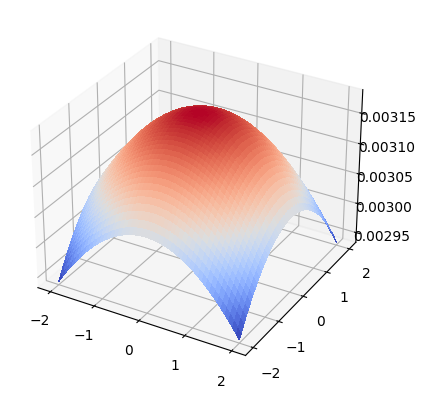

In [170]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

%matplotlib inline

def plot_result_surface(x_nodes, y_nodes, z_values):
  if isinstance(z_values, torch.Tensor):
    z_values = z_values.detach().numpy()

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


  # Plot the surface.
  surf = ax.plot_surface(x_nodes, y_nodes, np.reshape(z_values, x_nodes.shape), cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

  plt.show()

plot_result_surface(x_nodes, y_nodes, ground_truth)


To approximate the gaussian distribution, we will use a 2-layer network with hidden dimension of 25.

****
**Question 2.10**: What should be the number of features of the input and output layer for this problem?

<font color='green'>Write your answere here</font>

for input is 2, one for x and the other is for y, and for output the feature is 1 which represents the density function value given the two arguments x and y

****
**Task 2.11:** Define a PyTorch Net with the dimensions mentioned above and evalute it on the dataset.
*****

Shape of the output
: torch.Size([2500, 1])


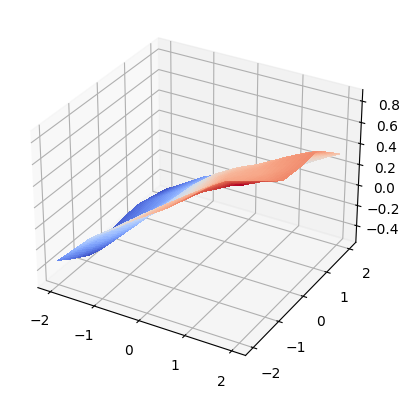

In [176]:
#Set the torch seed for reproducibility
torch.manual_seed(999)

# Initialize Pytorch network
########################################################################
#                        START OF YOUR CODE                            #
########################################################################
net = TorchNet(2, 25, 1)
########################################################################
#                         END OF YOUR CODE                             #
########################################################################


# Convert the numpy matrices to PyTorch tensors
torch_nodes = torch.Tensor(nodes)

# Evaluate the network on the grid - Perform forward pass
########################################################################
#                        START OF YOUR CODE                            #
########################################################################
prediction = net.forward(torch_nodes)
########################################################################
#                         END OF YOUR CODE                             #
########################################################################

print('Shape of the output\n:', prediction.shape)

# Plot the network's prediction
plot_result_surface(x_nodes, y_nodes, prediction)

Disappointingly, the results are far from providing a good approximation of the gaussian function. That is because we have not trained the network yet but we are only looking at the outcome of a random initialization of the weights and bias. Without proper training, neural networks have very poor performance, regardless of the task.

Moreover, currently we have no way of addressing how bad our network is at approximating the target function. Therefore, we need to come up with a systematic method of quantifying the error between the ground truth and the network's prediction.


## 2.5 Loss functions

Loss functions provide exactly this functionality, i.e. they quantify the error between the ground truth and the prediction. There are many types of loss functions with different properties and suitable for different kind of problems. The most commonly used loss function for regression problems is the **Mean-Square error** defined as:

$$
\mathrm{MSE}=\frac{1}{\text{n}} \sum_{i=1}^n\left(y_i-\hat{y}_i) \right)^2
$$

where $y_{i}$ is the observed data, $\hat{y}_{i}$ is the prediction and $n$ the number of samples.

PyTorch provides definitions of a myriad of loss functions, again saving some time for the user (check the documentation [here](https://pytorch.org/docs/stable/nn.html#loss-functions)).

Now we can use the MSE loss to measure how poorly our network is approximating the Gaussian.


In [177]:
# Define MSE loss function
MSE_loss = torch.nn.MSELoss()

# Compute MSE over the ground truth and network prediction
loss = MSE_loss.forward(ground_truth, prediction).item()

print(f"Average loss over whole dataset: {loss:.6f}")

Average loss over whole dataset: 0.138171


Let's see if we can improve that using a simple training procedure.



## 2.6 First steps toward training
We can work our way through a simple training loop in which the network parameters are randomly updated whenever the network performs worse than a desired threshold level for the loss function. That means we will repeat the following training steps:

1.   Compute forward pass of the network.
2.   Compute loss between prediction and ground truth values.
3.   If the loss is below a certain threshold, stop training.
4.   Otherwise, randomly update the network's parameters.


****
**Task 2.12:** Complete the code below to implement the training loop.
****

Iteration: 1.0, Loss: 0.00003820
Iteration: 2.0, Loss: 0.00285843
Iteration: 3.0, Loss: 0.00087207
Iteration: 4.0, Loss: 0.00124587
Iteration: 5.0, Loss: 0.00080949
Iteration: 6.0, Loss: 0.00152109
Iteration: 7.0, Loss: 0.00000404


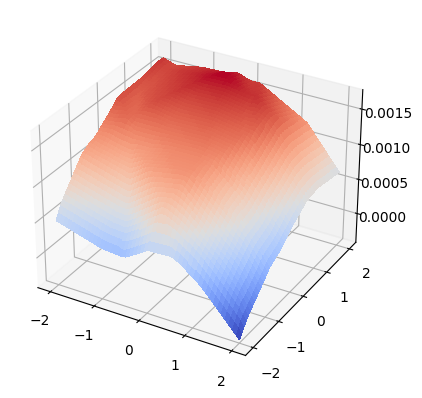

In [178]:
# Define the error threshhold
epsilon = 1e-5

# Maximum number of training iterations
iter_num = 0.
max_iters = 50


while loss > epsilon and iter_num < max_iters:
  iter_num += 1

  # Update network's weights and biases by drawing from a normal distributions
  for layer in net.children():
    if hasattr(layer, 'reset_parameters'):
        layer.weight = torch.nn.Parameter(0.025 * (-2 * torch.rand(layer.weight.shape) + 1))
        layer.bias = torch.nn.Parameter(0.05 * (-2 * torch.rand(layer.bias.shape) + 1))

    # Evaluate the network on the grid
    ########################################################################
    #                        START OF YOUR CODE                            #
    ########################################################################
    prediction = net.forward(torch_nodes)
    ########################################################################
    #                         END OF YOUR CODE                             #
    ########################################################################

    # Compute the loss
    ########################################################################
    #                        START OF YOUR CODE                            #
    ########################################################################
    loss = MSE_loss.forward(ground_truth, prediction).item()
    ########################################################################
    #                         END OF YOUR CODE                             #
    ########################################################################

  print(f"Iteration: {iter_num}, Loss: {loss:.8f}")

# Plot the network's prediction
plot_result_surface(x_nodes, y_nodes, prediction)

While the result is still not perfect, we can see that is much better than the initial one, even without applying any smart learning rule.

In the next labs, we will see how to implement learning algorithms to update the network parameters that will make the networks coverge much faster and achieve substantially better results.


**That's all for now, see you in the next lab!**